In [99]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
def f(X):
    y=[1/(4+x+x**2) for x in X]
    return y

In [101]:
def gen_X(N):
    X1=[-5+10/N*i for i in range(N+1)]
    X2=[-5*math.cos((2*i+1)/(2*N+2)*math.pi) for i in range(N+1)]
    return X1,X2

In [102]:
#4,6,8,插值点
X=[gen_X(N) for N in (4,8,16)]
y=[(f(x[0]),f(x[1])) for x in X]

In [103]:
def p(X,y,x):
    fx=0.0
    for i in range(len(X)):
        tmp=1.0
        for j in range(i):
            tmp*=(x-X[j])/(X[i]-X[j])
        for j in range(i+1,len(X)):
            tmp*=(x-X[j])/(X[i]-X[j])
        fx+=tmp*y[i]
    return fx

In [104]:
# 误差测量点
e_X=[i/50-5 for i in range(501)]
e_y=[([p(X[i][0],y[i][0],x) for x in e_X],[p(X[i][1],y[i][1],x) for x in e_X]) for i in range(3)]

In [105]:
# 准确的值
r_y=f(e_X)

In [106]:
error=[(max([abs(e_y[i][0][j]-r_y[j]) for j in range(501)]),
        max([abs(e_y[i][1][j]-r_y[j]) for j in range(501)])) for i in range(3)]

In [112]:
for e in error:
    print("%0.12e\t%0.11e"%(e[0],e[1]))

6.475332068311e-02	5.43760265007e-02
5.156056628633e-02	1.42609260655e-02
1.071904407255e-01	8.36727209693e-04


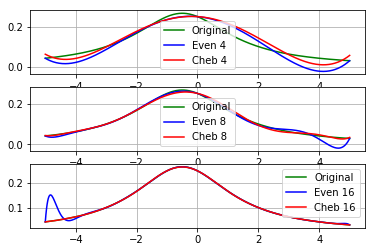

In [108]:
plt.figure(1)
plt.subplot(3,1,1)
plt.plot(e_X,r_y,"g",label="Original")
plt.plot(e_X,e_y[0][0],"b",label="Even 4")
plt.plot(e_X,e_y[0][1],"r",label="Cheb 4")
plt.grid(True)
plt.legend()

plt.subplot(3,1,2)
plt.plot(e_X,r_y,"g",label="Original")
plt.plot(e_X,e_y[1][0],"b",label="Even 8")
plt.plot(e_X,e_y[1][1],"r",label="Cheb 8")
plt.grid(True)
plt.legend()

plt.subplot(3,1,3)
plt.plot(e_X,r_y,"g",label="Original")
plt.plot(e_X,e_y[2][0],"b",label="Even 16")
plt.plot(e_X,e_y[2][1],"r",label="Cheb 16")
plt.grid(True)
plt.legend()

plt.savefig("./lab2.png",dpi=1000)
plt.show()